### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [2]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [3]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc, activations, radio, tv, ooh, pop, digital_performance, rotacion, comisiones, eventos_alto_bitacora,
eventos_bajo_bitacora, eventos_medio_bitacora 
from sal_indicators_in sa 
where sales_channel = 'Retail'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [4]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['rotacion']=df['rotacion'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')


df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,16482,41687525,771166,0,2884220.0,365633245,0.06,40858121,0.00,0.0,1.00
1,1.56,18220,57231920,95440163,79373000,8170000.0,422084086,0.09,51350477,0.75,0.0,0.25
2,1.51,17940,116243171,194643334,0,0.0,429255030,0.08,48781081,1.00,0.0,0.00
3,1.95,12894,117469351,366792554,0,34349575.0,426026002,0.09,44243710,0.30,0.1,0.60
4,3.30,13566,131734088,320208915,0,34349575.0,372675824,0.14,41994311,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

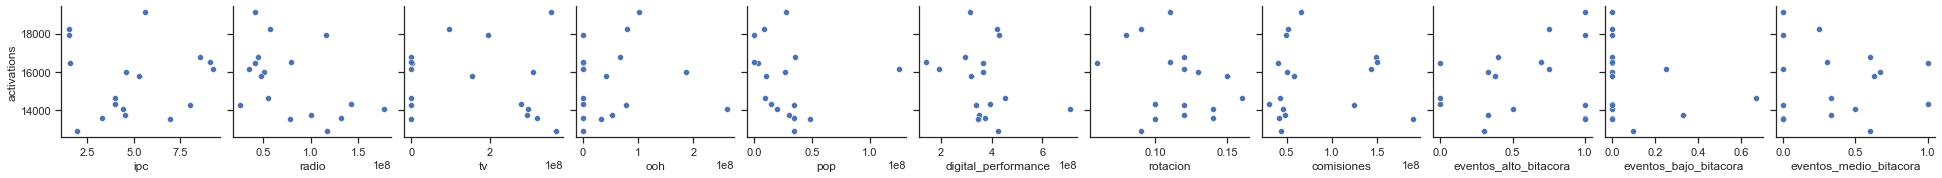

In [5]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

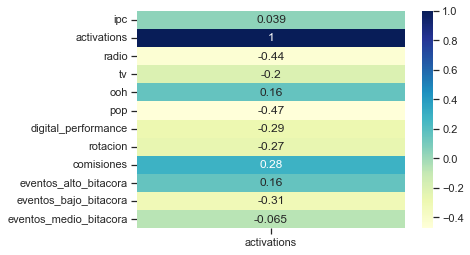

In [6]:
corrMatrix_1 = df.corr(method ='spearman')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,-1.311166,0.535501,-0.870890,-1.066161,-0.736316,-0.857172,-0.004035,-2.145928,-0.752219,-1.531394,-0.452709,1.889798
1,-1.326841,1.511559,-0.508717,-0.418478,0.365472,-0.669777,0.480201,-0.956337,-0.538920,0.536961,-0.452709,-0.343281
2,-1.346435,1.354312,0.866201,0.260227,-0.736316,-0.959425,0.541714,-1.352867,-0.591153,1.226413,-0.452709,-1.087641
3,-1.174010,-1.479515,0.894770,1.437996,-0.736316,0.258356,0.514015,-0.956337,-0.683393,-0.704052,0.117369,0.698822
4,-0.644979,-1.102121,1.227128,1.119291,-0.736316,0.258356,0.056376,1.026313,-0.729121,1.226413,-0.452709,-1.087641


### Omitir Variables 
De acuerdo a su correlación

In [8]:
#del df['eventos_medio_bitacora']
#del df['radio']
#del df['ipc']
#del df['eventos_alto_bitacora']
#del df['ooh']
#del df['pop']
del df['tv']
#del df['rotacion']
del df['comisiones']
#del df['digital_performance']
#del df['eventos_bajo_bitacora']

### Regresión Lineal

In [9]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: -0.7573013189405207
MAE:  1.0475891994731872
MSE:  1.6342870677262853

explained_variance: 0.42274733921417107




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.612
Model:                            OLS   Adj. R-squared (uncentered):              0.176
Method:                 Least Squares   F-statistic:                              1.405
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                       0.321
Time:                        13:47:50   Log-Likelihood:                         -16.065
No. Observations:                  17   AIC:                                      50.13
Df Residuals:                       8   BIC:                                      57.63
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ipc                       -0.3303      0.402     -0.822      0.435      -1.257       0.596
radio                      0.0185      0.413      0.045      0.965      -0.934       0.971
ooh                        0.9807      0.518      1.895      0.095      -0.213       2.174
pop                       -0.3043      0.276     -1.101      0.303      -0.941       0.333
digital_performance       -0.9692      0.607     -1.598      0.149      -2.368       0.430
rotacion                  -0.7343      0.446     -1.645      0.139      -1.763       0.295
eventos_alto_bitacora     56.4987     39.610      1.426      0.192     -34.843     147.841
eventos_bajo_bitacora     27.8718     19.541      1.426      0.192     -17.190      72.933
eventos_medio_bitacora    51.9614     36.609      1.419      0.194     -32.459     136.382
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.470
Skew:                          -0.171   Prob(JB):                        0.791
Kurtosis:                       2.260   Cond. No.                         441.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'radio', 'ooh', 'pop', 'digital_performance', 'rotacion',
       'eventos_alto_bitacora', 'eventos_bajo_bitacora',
       'eventos_medio_bitacora'],
      dtype='object')

w = [[-0.66434942  0.52588546  1.35186712 -0.26082004 -1.50126152 -0.89745343
  89.75285116 44.39034236 82.5635976 ]], b = [-0.24649158]


In [11]:
model.params

ipc                       -0.330260
radio                      0.018493
ooh                        0.980673
pop                       -0.304268
digital_performance       -0.969221
rotacion                  -0.734277
eventos_alto_bitacora     56.498673
eventos_bajo_bitacora     27.871778
eventos_medio_bitacora    51.961438
dtype: float64

\begin{align}
\dot{activations} = \ -ipc(4.63572450e+02) + radio(2.18176131e-05) + ooh(3.34143703e-05) - pop(1.64650362e-05) - digitalPerformance(2.29306877e-05) - rotacion(6.33668395e+04) + eventosAltoBitacora(4.40743782e+05) + eventosBajoBitacora(4.50606027e+05) + eventosMedioBitacora(4.37729034e+05) - 410468.96762248\\
\end{align}

### Modelo Regresión Activaciones con Recarga y con PAC

In [11]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select activations, activations_w_topups, activations_pacs
from sal_indicators_in sa 
where sales_channel = 'Retail'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [12]:
df2 = pd.DataFrame(data2,columns=['activations','activations_w_topups','activations_pacs'])



df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,activations,activations_w_topups,activations_pacs
0,16482,16307,15328
1,18220,18120,17365
2,17940,17908,17101
3,12894,12807,12184
4,13566,13649,13239


##### Recargas

In [13]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9901839731930179
MAE:  129.02636737027342
MSE:  23306.997362015867

explained_variance: 0.9902130985869918




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          1.020e+05
Date:                  Tue, 05 Jul 2022   Prob (F-statistic):                    7.18e-32
Time:                          21:37:49   Log-Likelihood:                         -113.70
No. Observations:                    17   AIC:                                      229.4
Df Residuals:                        16   BIC:                                      230.2
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.9923      0.003    319.396      0.000       0.986       0.999
==============================================================================
Omnibus:                       10.137   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.150
Skew:                          -1.505   Prob(JB):                       0.0280
Kurtosis:                       4.018   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[0.96065658]], b = [503.01747772]


\begin{align}
\dot{activations W topups} = \ activations(0.96065658) + 503.01747772\\
\end{align}

##### PACS

In [15]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9926979819511623
MAE:  95.71667366716702
MSE:  15644.169776761393

explained_variance: 0.9944797646693024




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.549e+05
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    2.55e-33
Time:                        21:37:49   Log-Likelihood:                         -109.37
No. Observations:                  17   AIC:                                      220.7
Df Residuals:                      16   BIC:                                      221.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     0.9550      0.002    393.551      0.000       0.950       0.960
==============================================================================
Omnibus:                        3.328   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.646
Skew:                          -0.741   Prob(JB):                        0.439
Kurtosis:                       3.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.91577032]], b = [627.24043626]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(0.91577032) + 627.24043626\\
\end{align}